# Deep Learning-Based Detection of Diseases in Apple Plants

## Project Objective

The objective of this project is to develop a Deep Learning-based system for detecting diseases in apple plants using leaf images. The system aims to automatically classify apple leaves into different disease categories and healthy leaves, enabling early detection and management of plant diseases to improve crop quality and yield.

## Classes Description

**The model classifies apple leaf images into the following categories:**

**Apple Scab (Apple___scab)** – A fungal disease causing dark, scabby lesions on leaves and fruits.

**Apple Black Rot (Apple___Black_rot)** – A fungal infection leading to blackened, rotting areas on leaves, fruit, and twigs.

**Cedar Apple Rust (Apple___Cedar_apple_rust)** – A fungal disease resulting in yellow-orange spots on leaves and can affect fruit quality.

**Healthy (Apple___healthy)** – Leaves that show no signs of disease.

The dataset used consisted of **6218** training images and **1553** testing images, distributed across these four classes.

## Import Libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow

In [66]:
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

## Sample Images & Classes

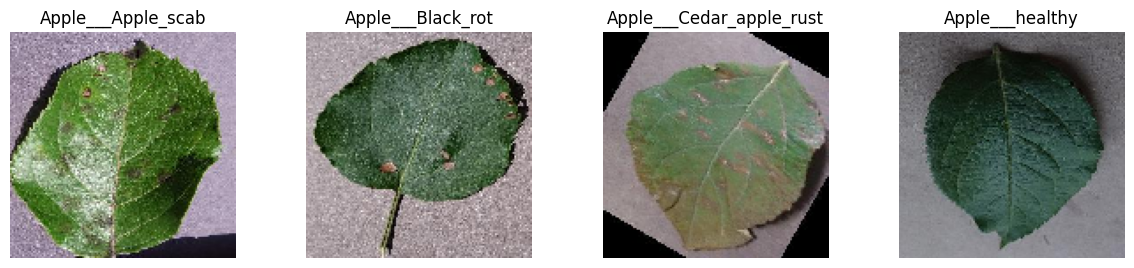

In [114]:
import os, random
from tensorflow.keras.preprocessing.image import load_img

data_dir = r'E:\Deep Learning\Datasets\Images Dataset\Apple Dataset' 
classes = os.listdir(data_dir)
plt.figure(figsize=(12, 10))

for i, cls in enumerate(classes):
    img_name = random.choice(os.listdir(os.path.join(data_dir, cls)))
    img_path = os.path.join(data_dir, cls, img_name)
    img = load_img(img_path, target_size=(128, 128))
    
    plt.subplot(4, 4, i+1) 
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [67]:
cnn=Sequential()

In [68]:
import warnings
warnings.filterwarnings("ignore")

## Data Augmentation

In [69]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

## Generators

In [70]:
train_generator = train_datagen.flow_from_directory(
    r'E:\Deep Learning\Datasets\Images Dataset\Apple Dataset',
    target_size=(224, 224),   # (224,224,3) hatao
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
test_generator = train_datagen.flow_from_directory(
    r'E:\Deep Learning\Datasets\Images Dataset\Apple Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 6218 images belonging to 4 classes.
Found 1553 images belonging to 4 classes.


## Design Model Architecture

In [71]:
cnn.add(Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64, (3,3), activation='relu', ))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128, (3,3), activation='relu'))
cnn.add(BatchNormalization())
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())

In [72]:
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(4, activation='softmax'))

## Model Compilation

In [73]:
cnn.compile(loss='categorical_crossentropy', optimizer=Adam( learning_rate=0.001), metrics=['accuracy'])

## Model Training

In [74]:
cnn.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // train_generator.batch_size,
         epochs=20,
        validation_data=test_generator,
        validation_steps=test_generator.samples // test_generator.batch_size,
        callbacks=EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True))

Epoch 1/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 489s 3s/step - accuracy: 0.5611 - loss: 3.3394 - val_accuracy: 0.2363 - val_loss: 29.2579
Epoch 2/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 29s 141ms/step - accuracy: 0.6250 - loss: 0.9338 - val_accuracy: 0.2402 - val_loss: 28.8680
Epoch 3/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 445s 2s/step - accuracy: 0.6576 - loss: 0.9025 - val_accuracy: 0.2259 - val_loss: 44.8119
Epoch 4/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 31s 151ms/step - accuracy: 0.7188 - loss: 2.4731 - val_accuracy: 0.2259 - val_loss: 44.9907
Epoch 5/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 455s 2s/step - accuracy: 0.6883 - loss: 0.8236 - val_accuracy: 0.2702 - val_loss: 17.1833
Epoch 6/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 31s 152ms/step - accuracy: 0.7188 - loss: 0.5842 - val_accuracy: 0.2630 - val_loss: 17.9252
Epoch 7/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 543s 3s/step - accuracy: 0.7228 - loss: 0.7522 - val_accuracy: 0.4928 - val_loss: 2.1906
Epoch 8/20
194/194 ━━━━━━━━━━━━━━━━━━━━ 31s 151ms/step - accuracy: 0.6562 - loss: 0.8

## Model Evaluation

In [75]:
loss, acc=cnn.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {acc * 100:.2f}%")

48/48 ━━━━━━━━━━━━━━━━━━━━ 33s 691ms/step - accuracy: 0.9193 - loss: 0.4314
Test Accuracy: 91.93%


In [76]:
loss, acc=cnn.evaluate(train_generator, steps=train_generator.samples // train_generator.batch_size)
print(f"Train Accuracy: {acc * 100:.2f}%")

194/194 ━━━━━━━━━━━━━━━━━━━━ 149s 767ms/step - accuracy: 0.9093 - loss: 0.3957
Train Accuracy: 90.93%


## Training Evaluation Graph

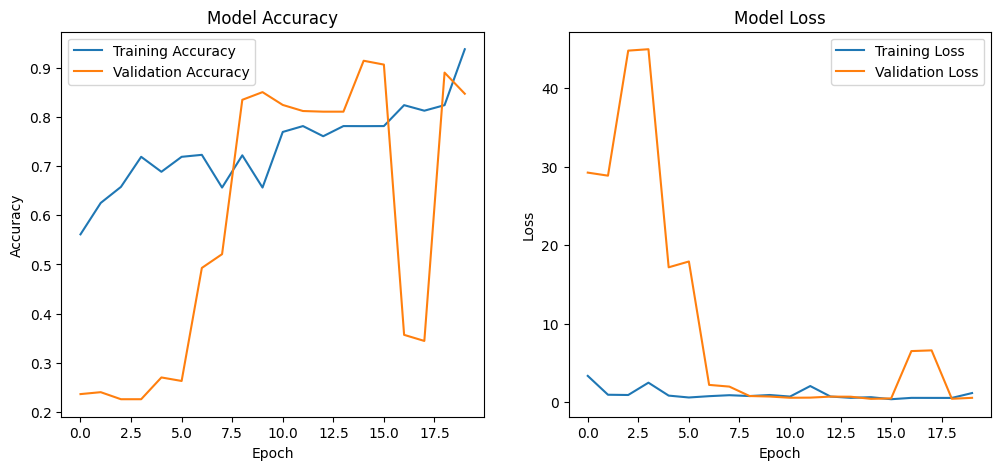

In [98]:

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(cnn.history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn.history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn.history.history['loss'], label='Training Loss')
plt.plot(cnn.history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()


## Confusion Matrix

49/49 ━━━━━━━━━━━━━━━━━━━━ 34s 682ms/step


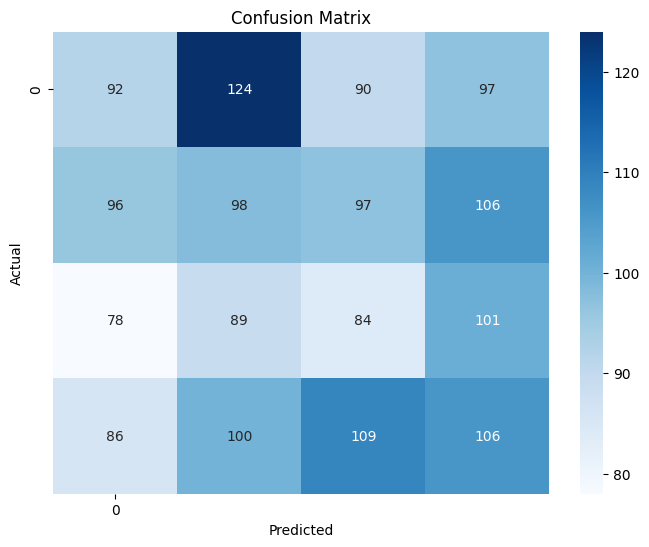

In [92]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_true = test_generator.classes 
y_pred = cnn.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=4, yticklabels=4)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



## Conclusion

The deep learning model achieved a training accuracy of 90.93% and a test accuracy of 91.93%, demonstrating strong generalization performance. This system effectively distinguishes between different apple diseases and healthy leaves, providing a reliable tool for automated disease detection in apple orchards. The model can assist farmers and agricultural experts in early disease identification, reducing crop losses and improving apple production efficiency.

---